In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances

In [2]:
df = pd.read_csv('dataset1.txt',header=None, sep=' ')

In [3]:
df.head()

,0,1
0,1.489034,-0.372265
1,-0.993560,0.113308
2,1.375386,-0.426868
3,-0.856408,0.516299
4,0.446398,-0.332782


In [4]:
points= df.values
x_point = df[0]
y_point= df[1]

In [5]:
len(df)

500

In [6]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(points)

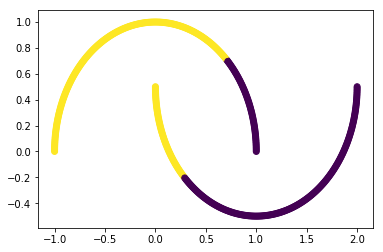

In [7]:
plt.scatter(x_point,y_point,c=kmeans.labels_.astype(float))

In [8]:
def getNeighbouringNodes(points_array, epsilon,point):
    list_indices=[]
    for i in range(points_array.shape[0]):
        dist = np.linalg.norm(point-points_array[i])
        if dist<=epsilon and dist>0:
            list_indices.append(i)
    return list_indices

In [9]:
def formClusters(possible_indices, isit_visited,min_points,epsilon,cluster_count,cluster, to_visit_index,points_array):
    isit_visited[to_visit_index]=1 # label it as visited
    
    if cluster[to_visit_index] == -1:
        if len(possible_indices)>=min_points:
            cluster[to_visit_index]= cluster_count # assign it to a cluster
            for i in possible_indices:
                point= points_array[i]
                neighbour_indices= getNeighbouringNodes(points_array,epsilon,point)
                if isit_visited[i]==0:
                    formClusters(neighbour_indices, isit_visited,min_points,epsilon,cluster_count,cluster,i,points_array)
        elif len(possible_indices)<min_points:
            cluster[to_visit_index]= 0 # assign it to a cluster
        

In [10]:
# implement DBScan
def DBScanImpl(points_array,epsilon,min_points):
    # mark all the points as unvisited
    #get the number of points
    isit_visited=[0]*(points.shape[0])
    cluster=[-1]*(points.shape[0])
#     epsilon=0.5 # this is for the first question
#     min_points= 20 # this is for the first question
    cluster_count=0
    #create an array and put 0 for unvisited in all positions
    while 0 in isit_visited:
        print("Enters for a cluster")
        if cluster_count in cluster or cluster_count==0 :
            cluster_count=cluster_count+1
        to_visit_index= isit_visited.index(0)
        print("Node visited is ",to_visit_index)
        point= points_array[to_visit_index]
        possible_indices= getNeighbouringNodes(points_array,epsilon,point)
        print("Number of points closer is ",len(possible_indices))
        formClusters(possible_indices, isit_visited,min_points,epsilon,cluster_count,cluster,to_visit_index,points_array)
#     print("Cluster array is ",cluster)
#         for i in range(len(possible_indices)):
#             isitvisited[i] = 1
#         if len(possible_indices)< min_points: # this is a boundary pointprint()     
    return cluster

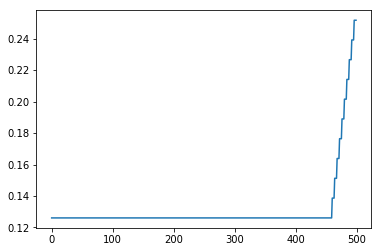

In [11]:
# need to implement the elbow method  to find the optimal epsilon and minPoints
y_axis_dist=[]
for i in range(points.shape[0]):
    distance_list=[]
    point = points[i]
    for j in range(points.shape[0]):
        dist = np.linalg.norm(point-points[j])
        if dist>0:
            distance_list.append(dist)
    distance_list.sort()
    kthdistance = distance_list[19] # choosing k as 4
    y_axis_dist.append(kthdistance)
x_axis_point = [x for x in range(500)]
y_axis_point= np.sort(y_axis_dist)
plt.plot(x_axis_point,y_axis_point)


In [12]:
cluster_mapping= DBScanImpl(points,0.255,20)

Enters for a cluster
Node visited is  0
Number of points closer is  40
Enters for a cluster
Node visited is  1
Number of points closer is  29


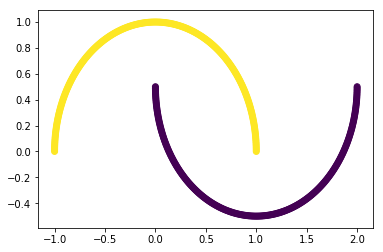

In [13]:
plt.scatter(x_point,y_point,c=cluster_mapping)

In [14]:
df1 = pd.read_csv('dataset2.txt',header=None, sep=' ')

In [15]:
df1.head()

,0,1
0,9.359071,0.337273
1,-1.136104,4.229264
2,-1.818084,4.651985
3,-8.952252,5.983762
4,-6.636040,5.606801


In [16]:
points1= df1.values
x_point1 = df1[0]
y_point1= df1[1]

In [17]:
kmeans1 = KMeans(n_clusters=2, random_state=0).fit(points1)

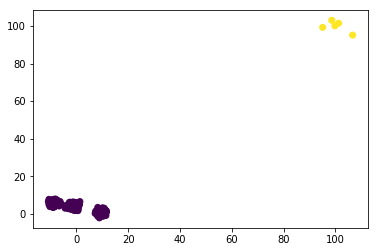

In [18]:
plt.scatter(x_point1,y_point1,c=kmeans1.labels_.astype(float))

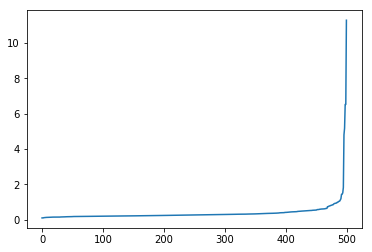

In [19]:
y_axis_dist=[]
for i in range(points1.shape[0]):
    distance_list=[]
    point = points1[i]
    for j in range(points1.shape[0]):
        dist = np.linalg.norm(point-points1[j])
        if dist>0:
            distance_list.append(dist)
    distance_list.sort()
    kthdistance = distance_list[2] # choosing k as 20
    y_axis_dist.append(kthdistance)
x_axis_point = [x for x in range(500)]
y_axis_point= np.sort(y_axis_dist)
plt.plot(x_axis_point,y_axis_point)


In [20]:
cluster_mapping=DBScanImpl(points1,10,2) # 15,2

Enters for a cluster
Node visited is  0
Number of points closer is  178
Enters for a cluster
Node visited is  495
Number of points closer is  4


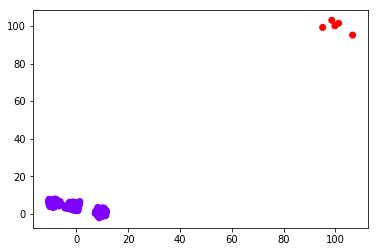

In [21]:
plt.scatter(x_point1,y_point1,c=cluster_mapping,cmap='rainbow')